**Ritz-Galerkin method** - Visualisation of approximate solutions given different sets of approach functions
T. Mirbach, 15.06.2020



In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sympy.parsing.sympy_parser import parse_expr
from sympy.plotting import plot
from sympy import symbols
from sympy import init_printing
init_printing()
from sympy import *



import rg_algorithm as rg

Enter DEQ here: add right hand side f in between the quotes. You might use exp(x), sin(x), cos(x)


For the boundary conditions, np.exp(x) etc. 
If condition i is on u, p_i is False. Its True for a condition on u'.


In [25]:
#inhomogeneous part
f = parse_expr("74*cos(3*x) + x**2")
#Lu = a2*u'' + a1*u' + a0*u, (a2 = 1)
a2 = 4
a1 = 0
a0 = -1
#boundary conditions: False - on u; True - on u'
x0 = -np.pi
y0 = 10
p0 = False
x1 = np.pi
y1 = 10
p1 = False

Enter approach functions v_i and sets of them V_i
p_i are the desired plots.

Labels of the plot are rounded on two digits.

<Figure size 1296x360 with 0 Axes>

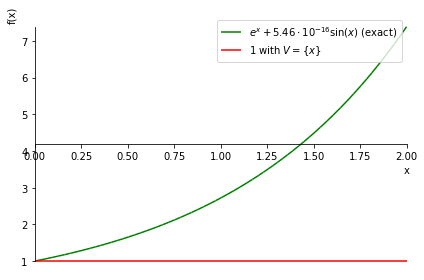

In [30]:
#choice of approach functions
v0 = parse_expr("x**2 - pi**2")
v1 = parse_expr("cos(3*x)+1")
v2 = parse_expr("x")
v3 = parse_expr("x**2-x")
v4 = parse_expr("cos(2*x)-1")
v5 = parse_expr("x-5")
v6 = parse_expr("sin(x)")
v7 = parse_expr("x**3")
v8 = parse_expr("x**2")
v9 = parse_expr("cos(x)-1")
V0 = [v0]
V = [v1]
V1 = [v1,v0]
V2 = [v2]
V3 = [v3]
V4 = [v2,v3,v7]
V5 = [v8]
V6 = [v2,v8,v9]


plt.figure(figsize=(18,5))

#find exact solution
u = Function('u')
x = Symbol('x')
real_sol = rg.exact(u,x,a2*u(x).diff(x,2)+a1*u(x).diff(x,1) + a0*u(x)-f, x0,y0,p0,x1,y1,p1,a2)
pr = plot(real_sol, (x,x0,x1),show = False, line_color = 'green', legend = True)
pr[0].label = "$"+latex(rg.pretty_label(real_sol))+"$ (exact)"

f_1,p_1 = rg.ritz_galerkin(x,a1,a0,x0,y0,p0,x1,y1,p1,f,V2,a2=a2)
#f_2,p_2 = rg.ritz_galerkin(x,a1,a0,x0,y0,p0,x1,y1,p1,f,V,col ='blue',a2=a2)
#f_3,p_3 = rg.ritz_galerkin(x,a1,a0,x0,y0,p0,x1,y1,p1,f,V1,col ='yellow',a2=a2)

pr.append(p_1[0])
#pr.append(p_2[0]) 
#pr.append(p_3[0])

pr.show() # show plot with everything inside


In [22]:
#Example 3.2.3
#inhomogeneous part
f = parse_expr("5+8*x - 2*x**2")
#Lu = a2*u'' + a1*u' + a0*u, (a2 = 1)
a2 = 1
a1 = 2
a0 = -1
#boundary conditions: False - on u; True - on u'
x0 = 0
y0 = -1
p0 = False
x1 = 1
y1 = 1
p1 = False

In [29]:
#Exercise 3.2.4
#inhomogeneous part
f = parse_expr("2*exp(x)")
#Lu = a2*u'' + a1*u' + a0*u, (a2 = 1)
a2 = 1
a1 = 0
a0 = 1
#boundary conditions: False - on u; True - on u'
x0 = 0
y0 = 1
p0 = False
x1 = 2
y1 = np.exp(2)
p1 = True

7.38905609893065
